### Merged files from 2020 to 2024


In [ ]:
import pandas as pd

bucket = 'diabetesriskprediction'
file_path = f'gs://{bucket}/merged_brfss_diabetes_key_2020_2024.parquet'

df = pd.read_parquet(file_path)
print("Shape:", df.shape)
print(df.head())
print(df.columns.tolist())

Shape: (2176755, 16)
   SEXVAR  GENHLTH  PHYSHLTH  CVDSTRK3  DIABETE4  _RFHLTH  _TOTINDA  _MICHD  \
0     2.0      2.0       3.0       2.0       1.0      1.0       1.0     2.0   
1     2.0      3.0      88.0       2.0       3.0      1.0       1.0     2.0   
2     2.0      3.0      88.0       2.0       3.0      1.0       1.0     2.0   
3     2.0      1.0      88.0       2.0       3.0      1.0       2.0     2.0   
4     2.0      2.0      88.0       1.0       3.0      1.0       1.0     2.0   

   _RACE  _AGEG5YR   _BMI5  _EDUCAG  _SMOKER3  _RFDRHV7  Year  _INCOMG1  
0    1.0       8.0  1660.0      4.0       1.0       1.0  2020       NaN  
1    2.0      10.0  2918.0      4.0       9.0       9.0  2020       NaN  
2    2.0      10.0     NaN      3.0       4.0       1.0  2020       NaN  
3    1.0      13.0     NaN      2.0       4.0       1.0  2020       NaN  
4    1.0      13.0  2034.0      4.0       4.0       1.0  2020       NaN  
['SEXVAR', 'GENHLTH', 'PHYSHLTH', 'CVDSTRK3', 'DIABETE4', '_

In [ ]:
df.head(5)

,SEXVAR,GENHLTH,PHYSHLTH,CVDSTRK3,DIABETE4,_RFHLTH,_TOTINDA,_MICHD,_RACE,_AGEG5YR,_BMI5,_EDUCAG,_SMOKER3,_RFDRHV7,Year,_INCOMG1
0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,2.0,1.0,8.0,1660.0,4.0,1.0,1.0,2020,NaN
1,2.0,3.0,88.0,2.0,3.0,1.0,1.0,2.0,2.0,10.0,2918.0,4.0,9.0,9.0,2020,NaN
2,2.0,3.0,88.0,2.0,3.0,1.0,1.0,2.0,2.0,10.0,NaN,3.0,4.0,1.0,2020,NaN
3,2.0,1.0,88.0,2.0,3.0,1.0,2.0,2.0,1.0,13.0,NaN,2.0,4.0,1.0,2020,NaN
4,2.0,2.0,88.0,1.0,3.0,1.0,1.0,2.0,1.0,13.0,2034.0,4.0,4.0,1.0,2020,NaN


### Changing the names of the columns to get more understanding of columns


In [ ]:
df = df.rename(columns={'SEXVAR':'SEX','DIABET4':'DIABETES','_RFHLTH':'RFHLTH','_TOTINDA':'TOTINDA',
          '_MICHD_':'MITCHD','_RACE':'RACE','_AGEG5YR':'AGEGRP','_BMI5':'BMI','_EDUCAG':'EDUCATION','_SMOKER3':
        'SMOKER','_RFDRHV7':'RFDRHVY','_INCOMG1':'INCOME'})

### Data Cleaning

In [ ]:
df.isnull().sum().value_counts

<bound method IndexOpsMixin.value_counts of SEX                0
GENHLTH           14
PHYSHLTH          11
CVDSTRK3           2
DIABETE4           0
RFHLTH             0
TOTINDA            0
_MICHD         23006
RACE          445216
AGEGRP             0
BMI           220566
EDUCATION          0
SMOKER             0
RFDRHVY      1336113
Year               0
INCOME        401952
dtype: int64>

In [ ]:
df = df.drop(columns=['RFDRHVY'])

### List of columns with very few nulls


In [ ]:
low_null_cols = ['GENHLTH', 'PHYSHLTH', 'CVDSTRK3']

# Drop the rows permanently
df.dropna(subset=low_null_cols, inplace=True)

# Verify they are now 0
print(df[low_null_cols].isnull().sum())

GENHLTH     0
PHYSHLTH    0
CVDSTRK3    0
dtype: int64


In [ ]:
null_percent = df.isnull().mean() * 100

# To make it readable, sort them and round to 2 decimal places
print(null_percent.sort_values(ascending=False).round(2))

RACE         20.45
INCOME       18.47
BMI          10.13
_MICHD        1.06
SEX           0.00
GENHLTH       0.00
PHYSHLTH      0.00
TOTINDA       0.00
RFHLTH        0.00
DIABETE4      0.00
CVDSTRK3      0.00
AGEGRP        0.00
EDUCATION     0.00
SMOKER        0.00
Year          0.00
dtype: float64


In [ ]:
# Drop rows where '_MICHD' has a null value
df = df.dropna(subset=['_MICHD'])
# Verify the result
print(f"Remaining nulls in _MICHD: {df['_MICHD'].isnull().sum()}")

Remaining nulls in _MICHD: 0


In [ ]:
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Store a copy of the original data to compare the "Spike"
df_before = df.copy()

# 1. Strategy for RACE (Categorical/Ethnicity) -> Most Frequent
race_imputer = SimpleImputer(strategy='most_frequent')
df[['RACE']] = race_imputer.fit_transform(df[['RACE']])

# 2. Strategy for INCOME and BMI (Numerical) -> Median
num_imputer = SimpleImputer(strategy='median')
df[['INCOME', 'BMI']] = num_imputer.fit_transform(df[['INCOME', 'BMI']])

# Verify nulls are gone
print("Null counts after imputation:")
print(df[['RACE', 'INCOME', 'BMI']].isnull().sum())

Null counts after imputation:
RACE      0
INCOME    0
BMI       0
dtype: int64


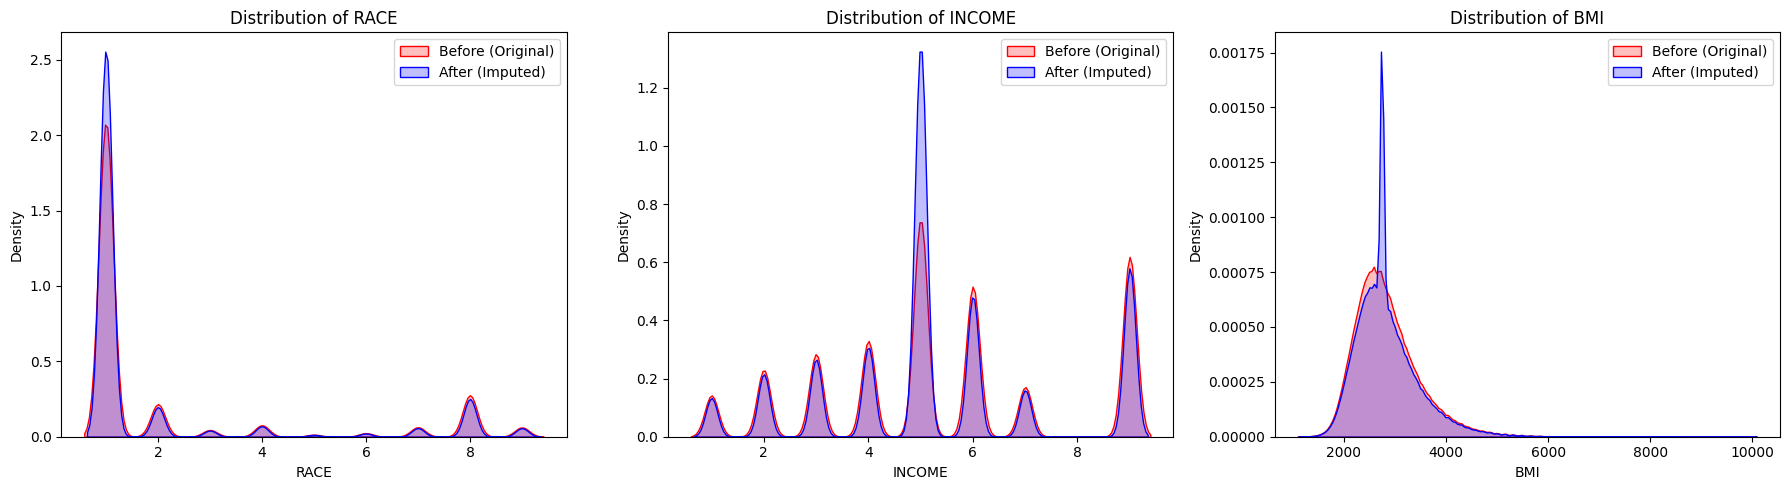

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

cols = ['RACE', 'INCOME', 'BMI']

for i, col in enumerate(cols):
    # Plot Original Distribution (excluding nulls)
    sns.kdeplot(df_before[col], ax=axes[i], label='Before (Original)', fill=True, color="red")
    # Plot Imputed Distribution
    sns.kdeplot(df[col], ax=axes[i], label='After (Imputed)', fill=True, color="blue")

    axes[i].set_title(f'Distribution of {col}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [ ]:
print("Shape:", df.shape)
print(df.head())
print(df.info())

Shape: (2153724, 15)
   SEX  GENHLTH  PHYSHLTH  CVDSTRK3  DIABETE4  RFHLTH  TOTINDA  _MICHD  RACE  \
0  2.0      2.0       3.0       2.0       1.0     1.0      1.0     2.0   1.0   
1  2.0      3.0      88.0       2.0       3.0     1.0      1.0     2.0   2.0   
2  2.0      3.0      88.0       2.0       3.0     1.0      1.0     2.0   2.0   
3  2.0      1.0      88.0       2.0       3.0     1.0      2.0     2.0   1.0   
4  2.0      2.0      88.0       1.0       3.0     1.0      1.0     2.0   1.0   

   AGEGRP     BMI  EDUCATION  SMOKER  Year  INCOME  
0     8.0  1660.0        4.0     1.0  2020     5.0  
1    10.0  2918.0        4.0     9.0  2020     5.0  
2    10.0  2741.0        3.0     4.0  2020     5.0  
3    13.0  2741.0        2.0     4.0  2020     5.0  
4    13.0  2034.0        4.0     4.0  2020     5.0  
<class 'pandas.core.frame.DataFrame'>
Index: 2153724 entries, 0 to 2176754
Data columns (total 15 columns):
 #   Column     Dtype  
---  ------     -----  
 0   SEX        float64


In [ ]:
print(df.describe())
print(df['DIABETE4'].value_counts(normalize=True) * 100)

                SEX       GENHLTH      PHYSHLTH      CVDSTRK3      DIABETE4  \
count  2.153724e+06  2.153724e+06  2.153724e+06  2.153724e+06  2.153724e+06   
mean   1.532693e+00  2.563912e+00  6.093952e+01  1.970048e+00  2.751301e+00   
std    4.989302e-01  1.080092e+00  3.704216e+01  3.124363e-01  7.352519e-01   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.000000e+00  2.000000e+00  1.500000e+01  2.000000e+00  3.000000e+00   
50%    2.000000e+00  2.000000e+00  8.800000e+01  2.000000e+00  3.000000e+00   
75%    2.000000e+00  3.000000e+00  8.800000e+01  2.000000e+00  3.000000e+00   
max    2.000000e+00  9.000000e+00  9.900000e+01  9.000000e+00  9.000000e+00   

             RFHLTH       TOTINDA        _MICHD          RACE        AGEGRP  \
count  2.153724e+06  2.153724e+06  2.153724e+06  2.153724e+06  2.153724e+06   
mean   1.195397e+00  1.255796e+00  1.912764e+00  1.975425e+00  7.735977e+00   
std    5.450257e-01  5.592900e-01  2.821811e-01  2.

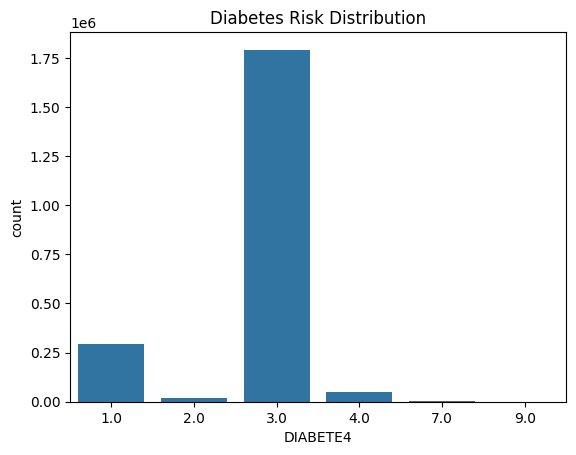

In [ ]:
sns.countplot(x='DIABETE4', data=df)
plt.title('Diabetes Risk Distribution')
plt.show()

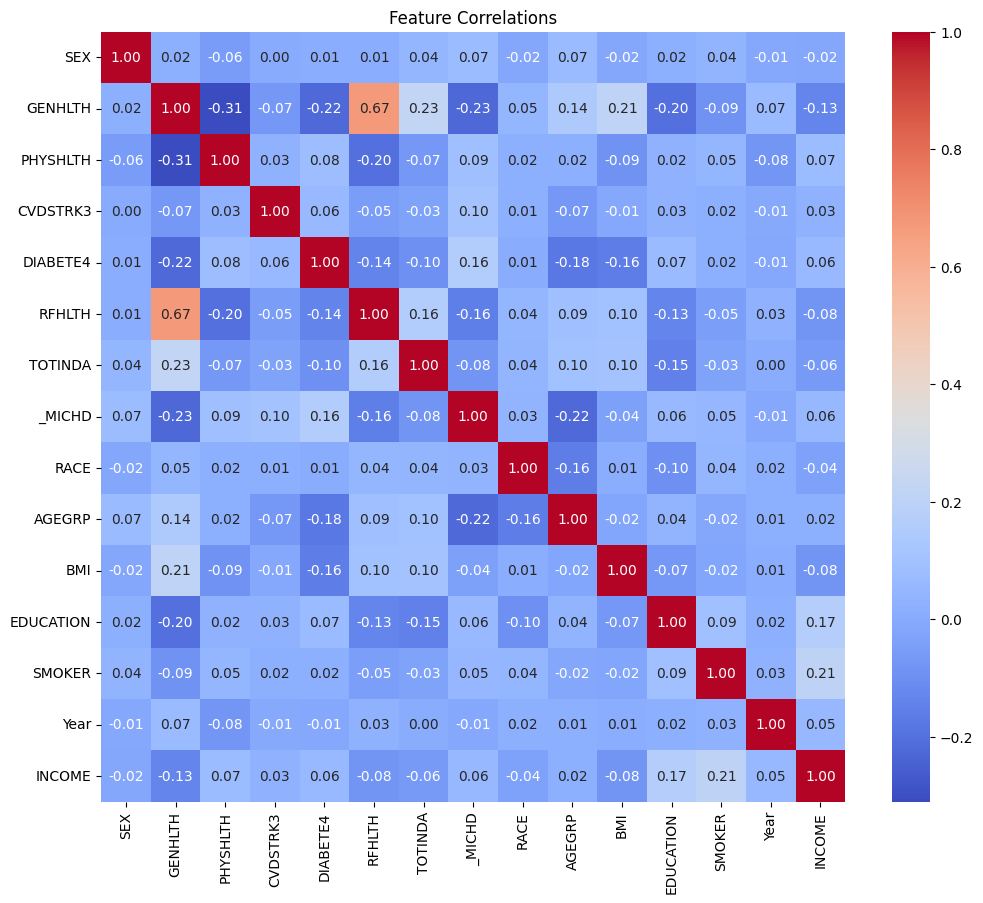

In [ ]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlations')
plt.show()

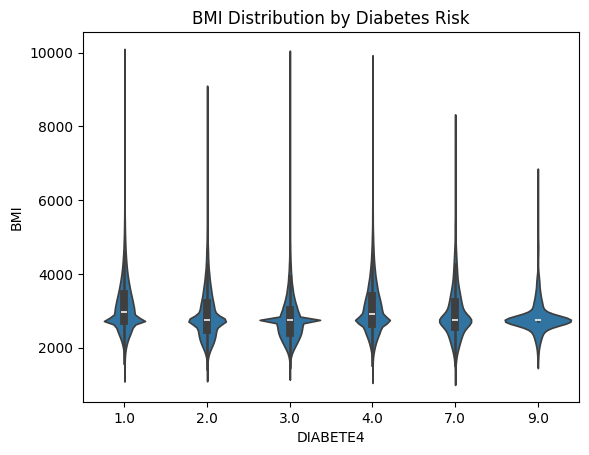

In [ ]:
sns.violinplot(x='DIABETE4', y='BMI', data=df)
plt.title('BMI Distribution by Diabetes Risk')
plt.show()

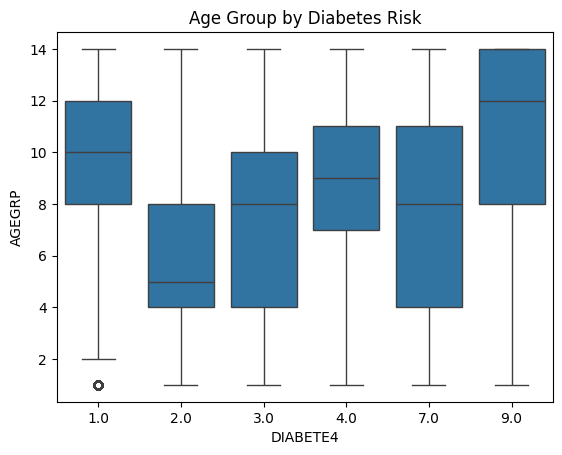

In [ ]:
sns.boxplot(x='DIABETE4', y='AGEGRP', data=df)
plt.title('Age Group by Diabetes Risk')
plt.show()

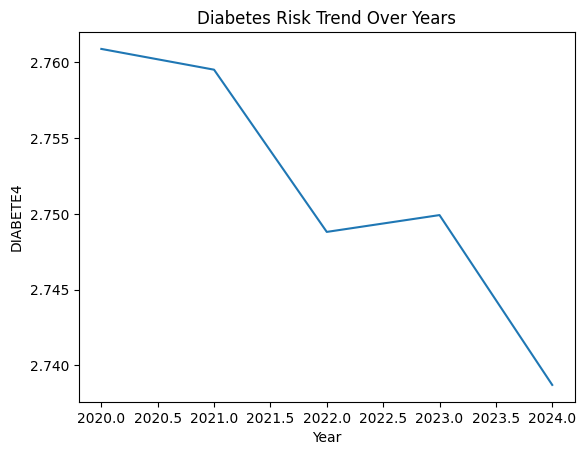

In [ ]:
sns.lineplot(x='Year', y='DIABETE4', data=df.groupby('Year')['DIABETE4'].mean().reset_index())
plt.title('Diabetes Risk Trend Over Years')
plt.show()

In [ ]:
df.isnull().sum()

,0
SEX,0
GENHLTH,0
PHYSHLTH,0
CVDSTRK3,0
DIABETE4,0
RFHLTH,0
TOTINDA,0
_MICHD,0
RACE,0
AGEGRP,0


In [ ]:
bucket_path = 'gs://diabetesriskprediction/cleaned_data.csv'

# Save to bucket
df.to_csv(bucket_path, index=False)

print(f"Data successfully saved to {bucket_path}")

Data successfully saved to gs://diabetesriskprediction/cleaned_data.csv
